In [18]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load Dataset
df = pd.read_csv("D:\\AI-ML-Internship-Tasks\\Task 3-Heart DIsease Prediction\\heart.csv")

In [6]:
# Data Cleaning
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


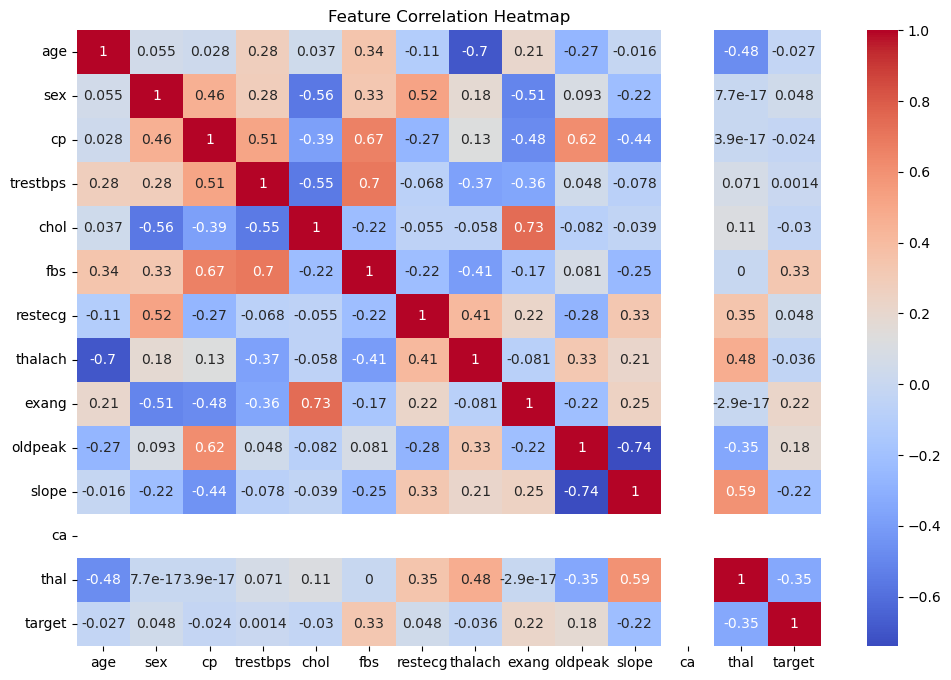

In [7]:
# Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

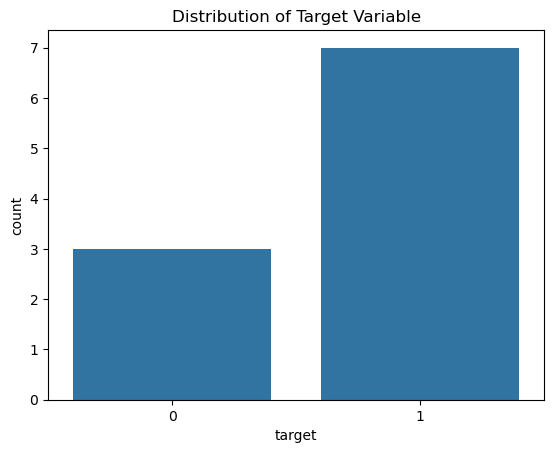

In [8]:
# Distribution of target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [9]:
# Feature and Target Split
X = df.drop('target', axis=1)
y = df['target']

In [10]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Model Training (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
# Prediction
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [13]:
# Evaluation Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.00


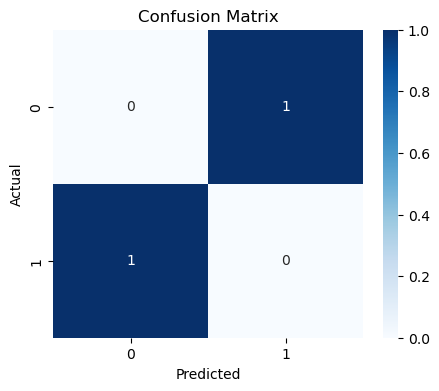

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

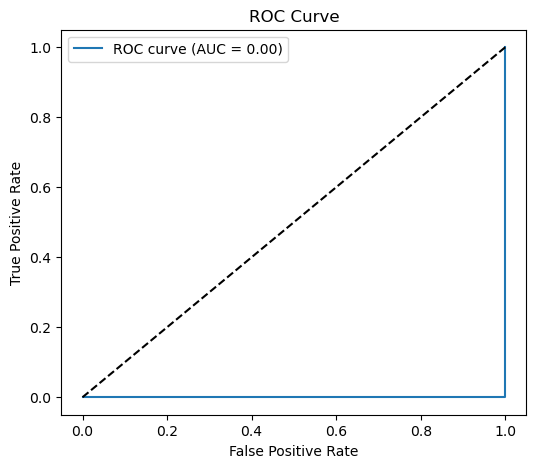

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


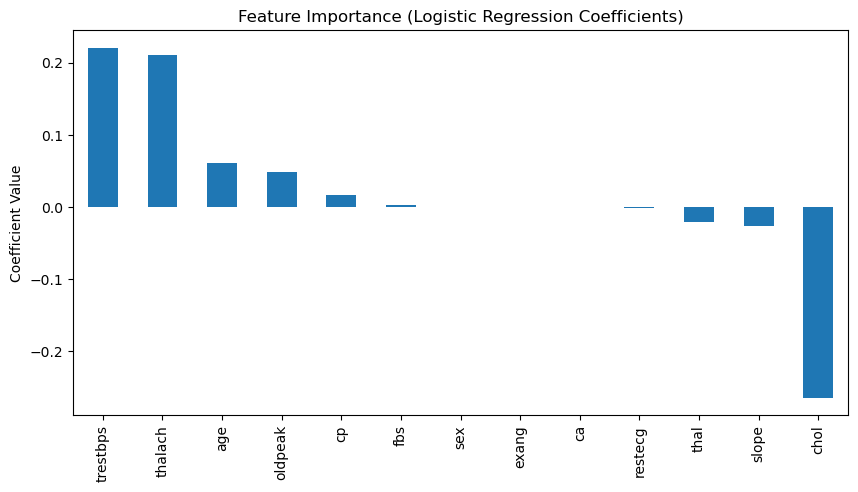

In [16]:
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
feature_importance.plot(kind='bar')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.ylabel('Coefficient Value')
plt.show()

In [17]:
print("Top features affecting prediction:\n", feature_importance.head())

Top features affecting prediction:
 trestbps    0.220928
thalach     0.211142
age         0.061532
oldpeak     0.048846
cp          0.016030
dtype: float64
